In [2]:
import matplotlib.pyplot as plt
from skimage.exposure import rescale_intensity
from skimage import io, filters, color, measure
from skimage.feature import peak_local_max
from scipy import ndimage 
import numpy as np
import xlrd
import freud.box
from freud import box, density
from scipy import stats
import os
%matplotlib inline

    
def get_dots2(file,microns=2,compare=False,spacing=5,size=2):
    image = color.rgb2gray(io.imread(file))
    i1 = filters.gaussian(image,sigma=.7)
    i1 = ndimage.maximum_filter(i1,size=size,mode='constant')
    coordinates = peak_local_max(i1, min_distance=spacing,indices=False)
    if compare:
        io.imshow(image -coordinates)
    label_img = measure.label(coordinates)
    centroids = []
    for region in measure.regionprops(label_img):
        centroids.append(region.centroid)
    scaled = microns*np.asarray(centroids)/image.shape - [microns/2,microns/2]
    return np.append(scaled,np.zeros((len(scaled),1)),axis=1)

def plot_rdf(dots,L,plot=True):
    box = freud.box.Box(L,L,is2D=True)
    box.periodic=[True,True,False]
    rdf = freud.density.RDF(20,.49,normalize=True)
    rdf.compute(system=(box,dots),reset=True)
    if plot:
        plt.scatter(rdf.bin_centers, rdf.rdf)
        plt.xlabel("r (μm)")
        plt.ylabel("<g(r)>")
        plt.show()
    return rdf.bin_centers, rdf.rdf

In [3]:
rdfs = []
R = []

<ipython-input-2-c72715f24221>:16: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  image = color.rgb2gray(io.imread(file))
<ipython-input-2-c72715f24221>:19: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  coordinates = peak_local_max(i1, min_distance=spacing,indices=False)


53.10441565643051


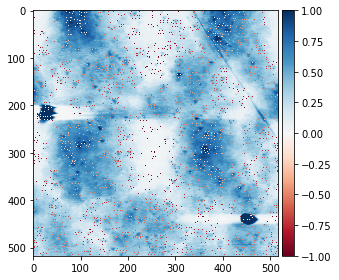

In [13]:
L=5
dots=get_dots2("86/5a.tif",compare=True,microns=L, spacing=3,size=20)
b=1/np.sqrt(len(dots)/(L*1000*1000*L))
print(b)
R.append(b)

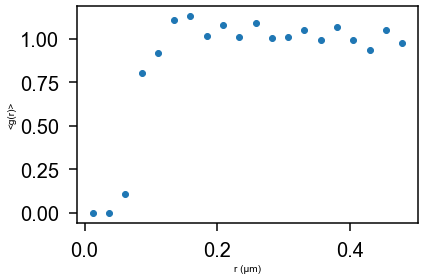

In [4]:
rdfs.append(plot_rdf(dots,L,plot=True)[1])


In [5]:
L=2
for i in "abcdefghijklm":
    dots=get_dots2("86/2"+i+".tif",compare=False, microns =L,size=20, spacing=20)
    rdfs.append(plot_rdf(dots,L,plot=False)[1])
    b=1/np.sqrt(len(dots)/(L*1000*1000*L))
    print(b)
    R.append(b)

<ipython-input-1-c72715f24221>:16: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  image = color.rgb2gray(io.imread(file))


246.18298195866547
254.00025400038098
244.33888871261047
232.49527748763856
232.49527748763856
239.04572186687875
251.9763153394848
242.535625036333
242.535625036333
250.0
248.0694691784169
254.00025400038098
242.535625036333


<ipython-input-1-c72715f24221>:16: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  image = color.rgb2gray(io.imread(file))


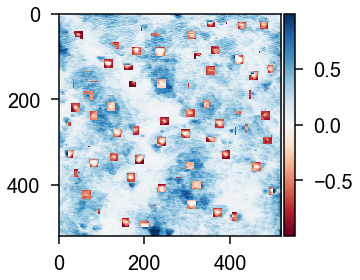

In [6]:
#sample
dots=get_dots2("86/2d.tif",compare=True, microns =L, spacing=20,size=20)

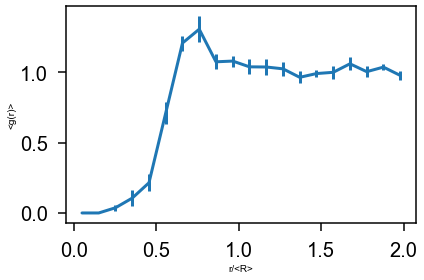

In [7]:
rdfs = np.asarray(rdfs)
mean_count = np.mean(rdfs,axis=0)
sem =  stats.sem(rdfs, axis=0, ddof=1)
r,rdf = plot_rdf(dots,L,plot=False)
plt.errorbar(1000*r/np.mean(R), mean_count, yerr=sem)
#plt.xlabel("r (μm)")
plt.xlabel("r/<R>")

plt.ylabel("<g(r)>")
plt.savefig("M86.png")
np.savetxt("M86.csv",(1000*r/np.mean(R),mean_count,sem),delimiter=',')
plt.show()

<ipython-input-1-c72715f24221>:16: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  image = color.rgb2gray(io.imread(file))


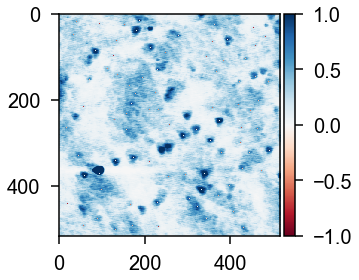

In [8]:
dots=get_dots2("86/2j.tif",compare=True, microns =L, spacing=15)


In [9]:
print(R)
print(np.mean(R),np.std(R))

[199.36305570722502, 246.18298195866547, 254.00025400038098, 244.33888871261047, 232.49527748763856, 232.49527748763856, 239.04572186687875, 251.9763153394848, 242.535625036333, 242.535625036333, 250.0, 248.0694691784169, 254.00025400038098, 242.535625036333]
241.39816934630855 13.401629466784863
